In [2]:
# Basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR


# Metrics
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [3]:
# Cargar dfser
df = pd.read_json('https://www.datos.gov.co/resource/75fz-q98y.json?$limit=135000', )


In [4]:

df.dropna(inplace=True)
df.drop(['descripcion_conducta', 'orden', 'edad', 'ano'], axis=1, inplace=True)
# Parse the latitude and longitude columns
df['latitud'] = df['latitud'].str.replace(',', '.').astype(float)
df['longitud'] = df['longitud'].str.replace(',', '.').astype(float)

In [5]:
#La clasificacion va en orden como 0 es el primero que aparece, luego el siguiente sera el 1.

df['armas_medios'], uniques_armas_medios = pd.factorize(df['armas_medios'])
df['barrios_hecho'], uniques_barrios_hecho = pd.factorize(df['barrios_hecho'])
df['zona'], uniques_zona = pd.factorize(df['zona'])
df['nom_comuna'], uniques_nom_comuna = pd.factorize(df['nom_comuna'])
df['conducta'], uniques_conducta = pd.factorize(df['conducta'])
df['mes'], uniques_mes = pd.factorize(df['mes'])
df['dia_semana'], uniques_mes = pd.factorize(df['dia_semana'])
df['clasificaciones_delito'], uniques_clasificaciones = pd.factorize(df['clasificaciones_delito'])
df['curso_de_vida'], uniques_vida = pd.factorize(df['curso_de_vida'])
df['estado_civil_persona'], uniques_estado = pd.factorize(df['estado_civil_persona'])
df['genero'], uniques_gender = pd.factorize(df['genero'])
df['movil_agresor'], uniques_agresor = pd.factorize(df['movil_agresor'])
df['movil_victima'], uniques_agresor = pd.factorize(df['movil_victima'])
df["latitud"] = pd.to_numeric(df["latitud"], errors='coerce')
df["longitud"] =pd.to_numeric(df["longitud"], errors='coerce')
df['dia']= pd.to_numeric(df["dia"])


# Delete records out of AMB
df = df.loc[(df['latitud']>= 6) & (df['latitud'] <= 8)]
df = df.loc[(df['longitud'] >= -74) & (df['longitud'] <=-72)]

df['mes'] = df['mes'].apply(lambda x: x+1)
df['dia_semana'] = df['dia_semana'].apply(lambda x: x+1)

Eliminar colunas con valores Nan en latitud y longitud, los valores con nan representa 7.32% del dataset.

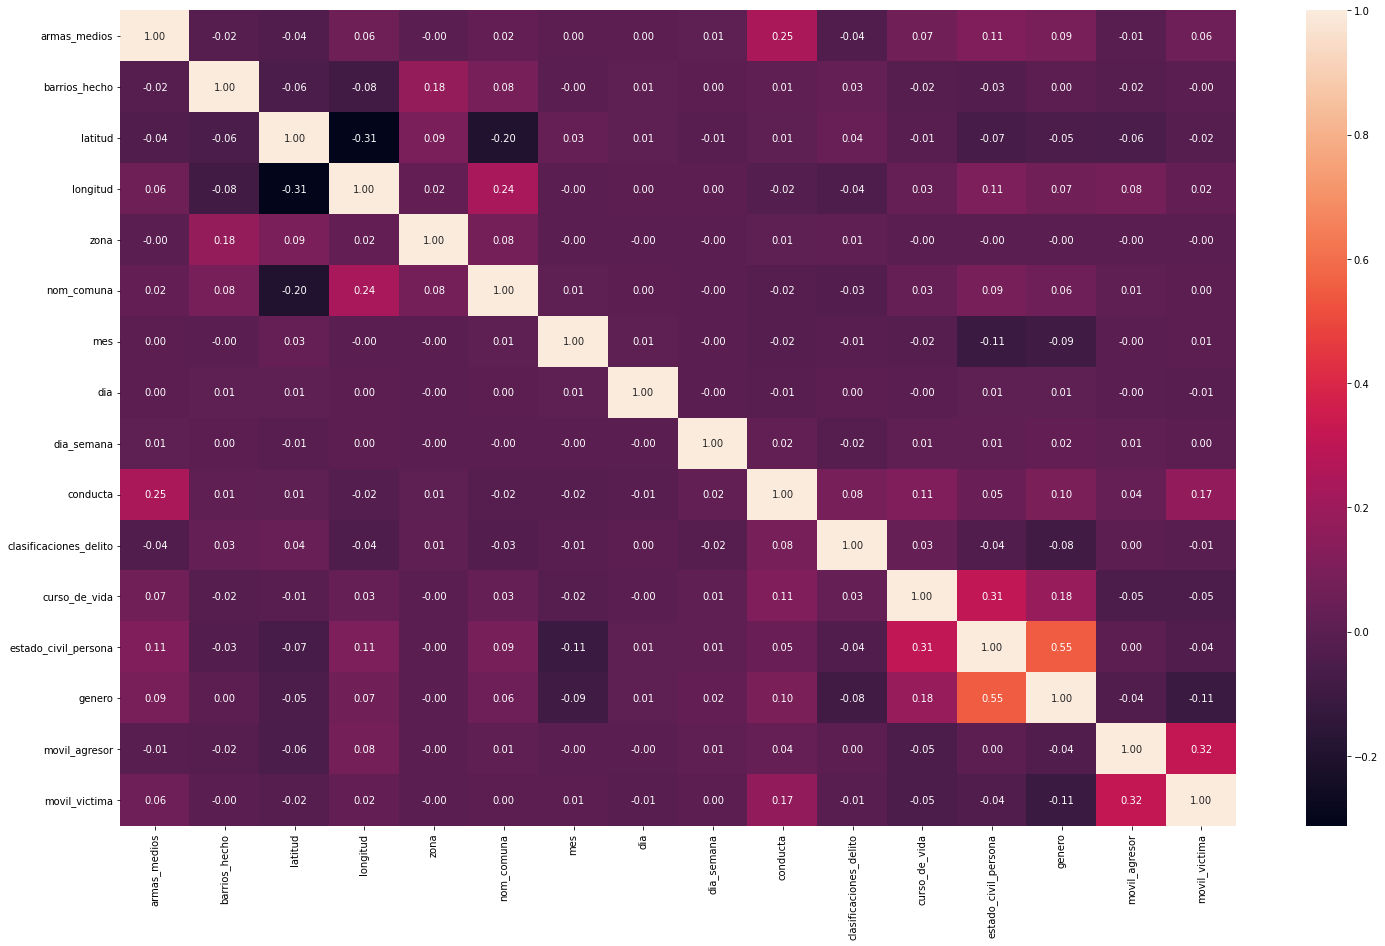

In [6]:
#@title Correlation
plt.subplots(figsize=(25,15)) 
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Training

In [7]:
X = df[['conducta', 'dia_semana', 'curso_de_vida', 'movil_victima']]
y = df[[ 'latitud', 'longitud', 'armas_medios']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
#Tree Regressor
treeDepth = 100
desicionTreeModel = DecisionTreeRegressor(max_depth=treeDepth)
desicionTreeModel.fit(X_train,y_train)

# # Random Forest
randomForestModel = RandomForestRegressor(max_depth=treeDepth)
randomForestModel.fit(X_train,y_train)

RandomForestRegressor(max_depth=100)

In [9]:
# Error RMSE
errors = []

s = cross_val_score(desicionTreeModel, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("RMSE Desicion Tree %.3f (+/- %.5f)"%(np.sqrt(np.mean(s)), np.sqrt(np.std(s))))
print("MAE Desicion Tree  %.3f"% mean_absolute_error(y_test, desicionTreeModel.predict(X_test)))
errors.append(np.sqrt(np.mean(s)))



s = cross_val_score(randomForestModel, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("RMSE Random Forest %.3f (+/- %.5f)"%(np.sqrt(np.mean(s)), np.sqrt(np.std(s))))
errors.append(np.sqrt(np.mean(s)))

RMSE Desicion Tree 1.950 (+/- 0.50042)
MAE Desicion Tree  0.534
RMSE Random Forest 1.935 (+/- 0.49425)


In [10]:
#@title Comparacion de Errores

import plotly.express as px
fig = px.bar(color=['Desicion Tree', 'Random Forest'], y=errors, title="Comparacion de erroes crossValidation")
fig.show()


**LinearSVR**

In [11]:
from sklearn.svm import LinearSVR

# SVR armas_medios
X = df[['conducta', 'dia_semana', 'curso_de_vida', 'movil_victima']]
y = df['armas_medios']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = LinearSVR()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
print(predictions)


s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("RMSE Random Forest %.3f (+/- %.5f)"%(np.sqrt(np.mean(s)), np.sqrt(np.std(s))))



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[3.65870436 2.78422763 1.99815247 ... 4.44473208 3.99559013 1.99909996]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarni

RMSE Random Forest 3.517 (+/- 0.74232)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [12]:
#SVR longitud
X = df[['conducta', 'dia_semana', 'curso_de_vida', 'movil_victima']]
y = df['longitud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = LinearSVR()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
print(predictions)

s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("RMSE Random Forest %.3f (+/- %.5f)"%(np.sqrt(np.mean(s)), np.sqrt(np.std(s))))
fig = px.line(s, title='XValidation RMSE')
fig.show()
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[-73.11706944 -73.11423712 -73.12838818 ... -73.10120876 -73.11751088
 -73.12865567]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



KeyboardInterrupt: ignored

In [ ]:
#SVR latitud
X = df[['conducta', 'dia_semana', 'curso_de_vida', 'movil_victima']]
y = df['latitud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = LinearSVR()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
print(predictions)

s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("RMSE Random Forest %.3f (+/- %.5f)"%(np.sqrt(np.mean(s)), np.sqrt(np.std(s))))


###DNN Model 
The neural network is designed to predict the latitude, longitude, and crime type based on the input features. It has 18 input nodes, four hidden layers with 64 nodes each, and three output nodes. The output layer uses linear activation functions for latitude and longitude, and categorical cross-entropy for the crime type. The optimizer used is Adam and the loss function is mean squared error for latitude and longitude, and categorical cross-entropy for the crime type.

Epoch 1/15
3171/3171 [==============================] - 14s 3ms/step - loss: 84.1535 - mse: 84.1535 - val_loss: 2.0493 - val_mse: 2.0493
Epoch 2/15
3171/3171 [==============================] - 8s 2ms/step - loss: 2.0520 - mse: 2.0520 - val_loss: 2.0213 - val_mse: 2.0213
Epoch 3/15
3171/3171 [==============================] - 9s 3ms/step - loss: 2.0156 - mse: 2.0156 - val_loss: 2.0097 - val_mse: 2.0097
Epoch 4/15
3171/3171 [==============================] - 9s 3ms/step - loss: 2.0083 - mse: 2.0083 - val_loss: 2.0242 - val_mse: 2.0242
Epoch 5/15
3171/3171 [==============================] - 8s 3ms/step - loss: 2.0034 - mse: 2.0034 - val_loss: 1.9957 - val_mse: 1.9957
Epoch 6/15
3171/3171 [==============================] - 8s 3ms/step - loss: 1.9971 - mse: 1.9971 - val_loss: 1.9951 - val_mse: 1.9951
Epoch 7/15
3171/3171 [==============================] - 9s 3ms/step - loss: 1.9922 - mse: 1.9922 - val_loss: 1.9831 - val_mse: 1.9831
Epoch 8/15
3171/3171 [==============================] - 8s 

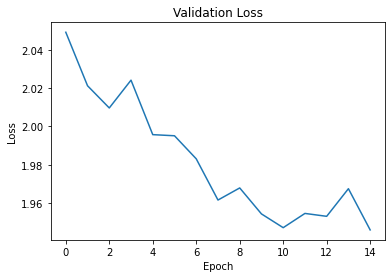

793/793 [==============================] - 1s 1ms/step


In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

X = df[[ 'dia_semana', 'curso_de_vida', 'nom_comuna', 'estado_civil_persona']]
y = df[[ 'latitud', 'longitud','conducta']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
X_mean = X_train.mean()
X_std = X_train.std()
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Define the model architecture
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)


In [15]:
model.predict(np.reshape([1,2,3,5], (1, 4)))[0]

1/1 [==============================] - 0s 84ms/step


array([  7.1016107, -73.11092  ,   3.056659 ], dtype=float32)